In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print("Default payment   yes = 1 , no = 0\n"
      "Gender: 1 = male  2 = female\n"
      "Education: 1 = graduate 2 = university 3 = high school 4 = others\n"
      "Marital: 1 = married 2 = single 3 = others\n"
      "Pay_:  -1 = pay duly; 1 = payment delay for one month; \n"
      "2 = payment delay for two months; . . .; \n"
      "8 = payment delay for eight months; \n"
      "9 = payment delay for nine months and above.")
rawdata = pd.read_csv('UCIcredit card.csv')
del rawdata['ID']
rawdata.head()

Default payment   yes = 1 , no = 0
Gender: 1 = male  2 = female
Education: 1 = graduate 2 = university 3 = high school 4 = others
Marital: 1 = married 2 = single 3 = others
Pay_:  -1 = pay duly; 1 = payment delay for one month; 
2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above.


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_in9  PAY_in8  PAY_in7  \
0      20000    2          2         1   24        2        2       -1   
1     120000    2          2         2   26       -1        2        0   
2      90000    2          2         2   34        0        0        0   
3      50000    2          2         1   37        0        0        0   
4      50000    1          2         1   57       -1        0       -1   

   PAY_in6  PAY_in5  ...  BILL_AMT6  BILL_AMT5  BILL_AMT4  PAY_AMT9  PAY_AMT8  \
0       -1       -2  ...          0          0          0         0       689   
1        0        0  ...       3272       3455       3261         0      1000   
2        0        0  ...      14331      14948      15549      1518      1500   
3        0        0  ...      28314      28959      29547      2000      2019   
4        0        0  ...      20940      19146      19131      2000     36681   

   PAY_AMT7  PAY_AMT6  PAY_AMT5  PAY_AMT4  default  
0         0         0         0         0        1  
1      1000      1000         0      2000        1  
2      1000      1000      1000      5000        0  
3      1200      1100      1069      1000        0  
4     10000      9000       689       679        0  

[5 rows x 24 columns]

In [4]:
data = rawdata[:]
print(data.describe().T)

             count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_in9    30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_in8    30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_in7    30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_in6    30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_in5    30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_in4    30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT9  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT8  30000.0   49179.075167   71173.768783  -69777.0   298

In [8]:
del data['PAY_in8']
del data['PAY_in7']
del data['PAY_in6']
del data['PAY_in5']
del data['PAY_in4']
del data['BILL_AMT4']
del data['BILL_AMT5']
del data['BILL_AMT6']
del data['BILL_AMT7']
del data['BILL_AMT8']
del data['PAY_AMT4']
del data['PAY_AMT5']
del data['PAY_AMT6']
del data['PAY_AMT7']
del data['PAY_AMT8']
for i in range(0,30000):
    if data['EDUCATION'][i] >= 4:
        data = data.drop([i])
    elif data['MARRIAGE'][i]==3:
        data = data.drop([i])
    elif data['PAY_in9'][i] == -2:
        data = data.drop([i])
print(data.shape)
data = pd.concat([data],ignore_index=True)
# data.to_csv('G:/LessFeature.csv')
print(data.describe())

(26556, 9)
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    26556.000000  26556.000000  26556.000000  26556.000000  26556.000000   
mean    159652.571170      1.594969      1.822375      1.541309     35.235804   
std     127331.718311      0.490907      0.695715      0.501839      9.216976   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     130000.000000      2.000000      2.000000      2.000000     34.000000   
75%     230000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      3.000000      2.000000     79.000000   

            PAY_in9      BILL_AMT9       PAY_AMT9       default  
count  26556.000000   26556.000000   26556.000000  26556.000000  
mean       0.184516   55221.449842    5548.885826      0.231963  
std        0.979201   75220.997219   15225.270168      0.4220

In [9]:
print("We have %d with default=0" % len(data.loc[data["default"]==0]))
print("We have %d with default=1" % len(data.loc[data["default"]==1]))

We have 20396 with default=0
We have 6160 with default=1


In [13]:
print("%d EDUCATION=4" % len(data.loc[data['EDUCATION']>=4]))
print("%d Marital=3" % len(data.loc[data['MARRIAGE']==3]))

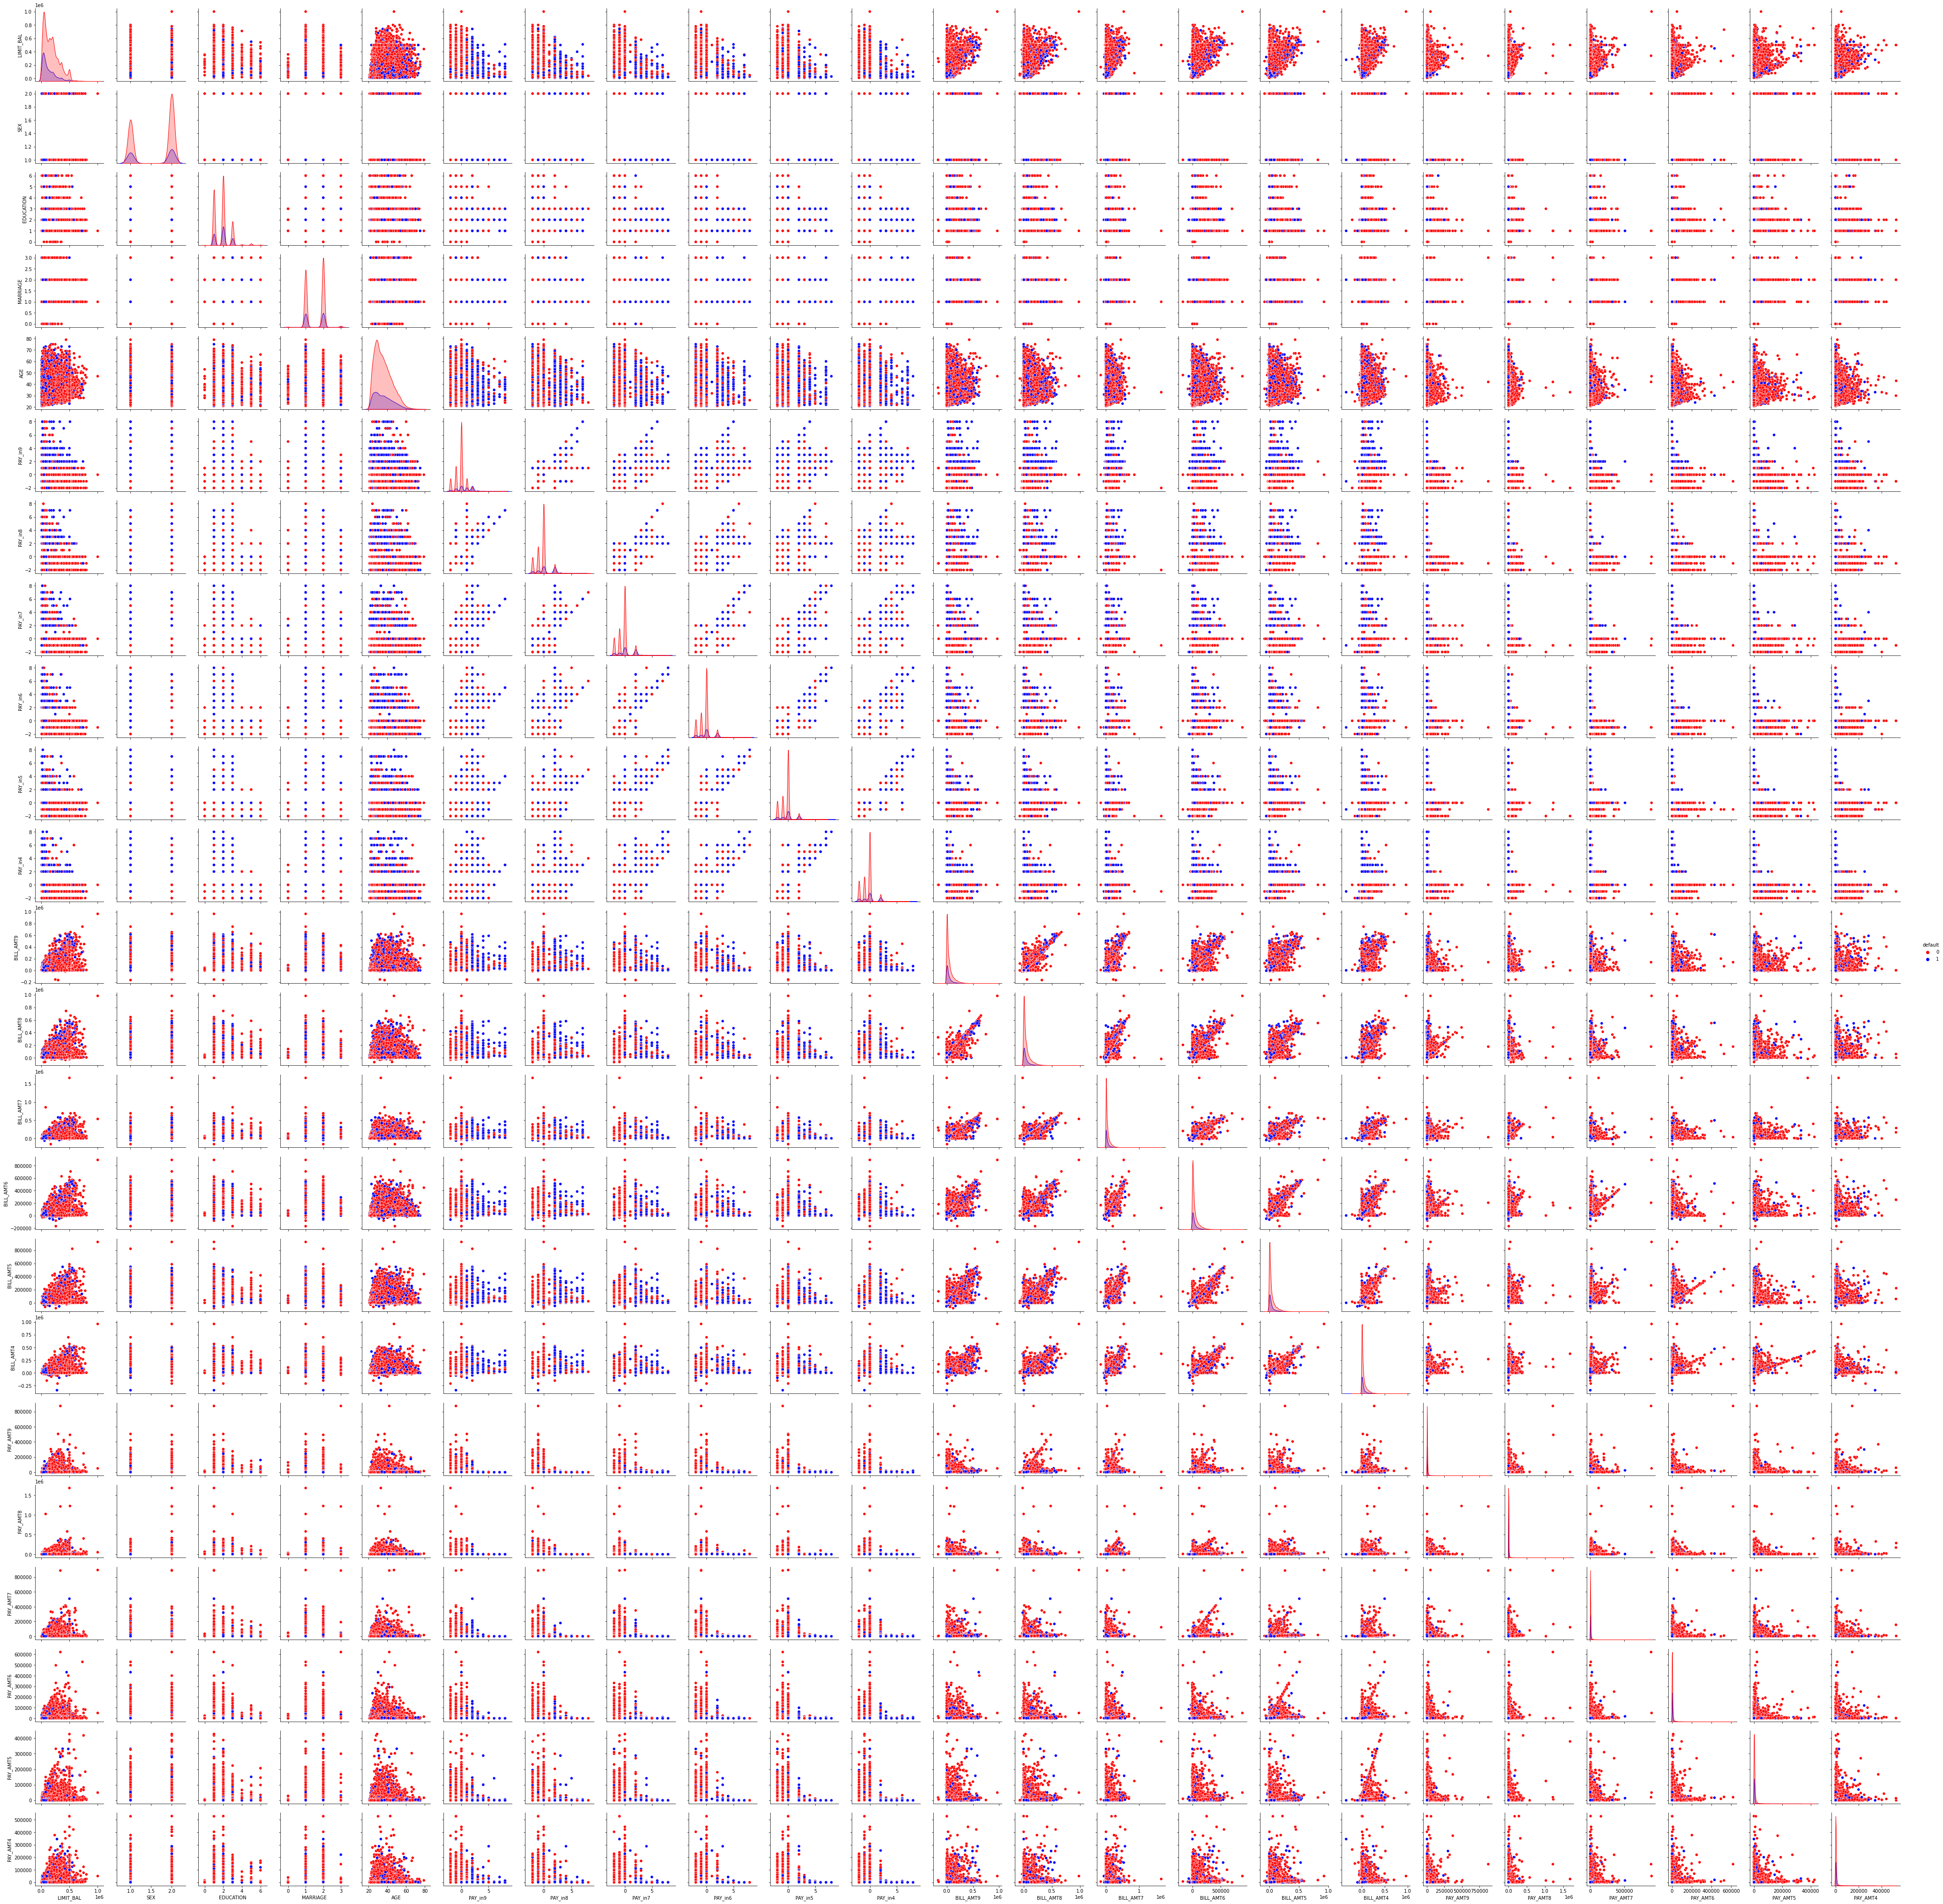

In [6]:
sns.pairplot(data=data,hue='default',palette=['Red','Blue'])
plt.savefig('pairplot.png')

f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

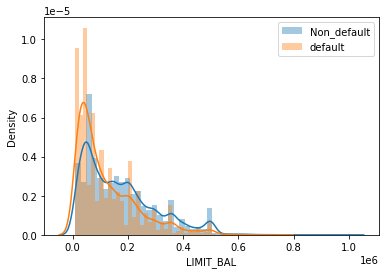

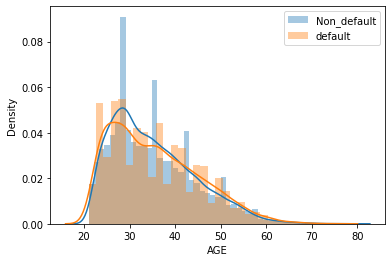

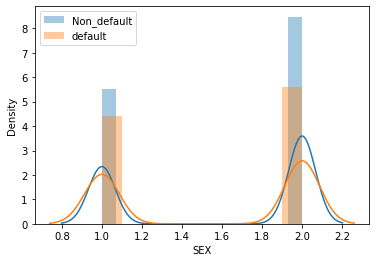

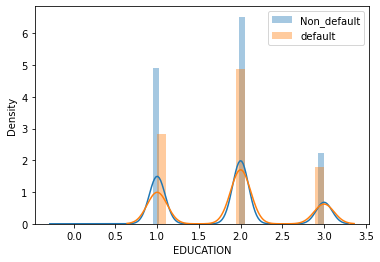

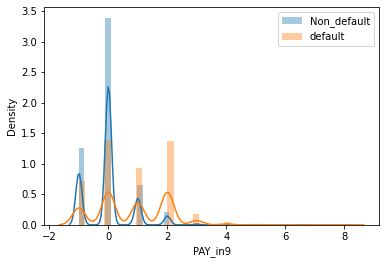

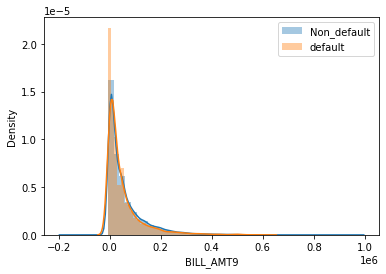

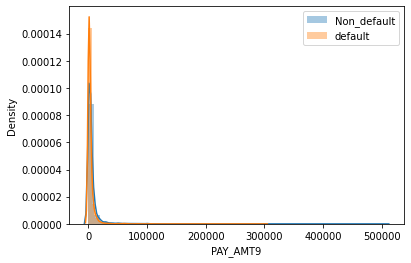

In [13]:
fig = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['LIMIT_BAL'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['LIMIT_BAL'],label='default')
plt.legend()
plt.title("")
plt.savefig("limit_dis.jpeg")

fig0 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['AGE'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['AGE'],label='default')
plt.legend()
plt.title("")
plt.savefig("age_dis.jpeg")

fig1 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['SEX'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['SEX'],label='default')
plt.legend()
plt.title("")
plt.savefig("sex_dis.jpeg")
plt.show()
fig2 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['EDUCATION'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['EDUCATION'],label='default')
plt.legend()
plt.show()
fig3 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['PAY_in9'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['PAY_in9'],label='default')
plt.legend()
plt.title("")
plt.savefig("payin9_dis.jpeg")

fig4 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['BILL_AMT9'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['BILL_AMT9'],label='default')
plt.legend()
fig5 = plt.figure()
sns.distplot(data.loc[data['default'] == 0]['PAY_AMT9'],label='Non_default')
sns.distplot(data.loc[data['default'] == 1]['PAY_AMT9'],label='default')
plt.legend()

In [19]:
data.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    29231.000000  29231.000000  29231.000000  29231.000000  29231.000000   
mean    168052.536006      1.603264      1.803325      1.536896     35.396702   
std     130004.028599      0.489229      0.698817      0.502337      9.180305   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      3.000000      2.000000     79.000000   

            PAY_in9      BILL_AMT9       PAY_AMT9       default  
count  29231.000000   29231.000000   29231.000000  29231.000000  
mean      -0.015395   50961.091136    5640.058910      0.223017  
std        1.125986   73430.699615   15861.764643      0.416277  
min       -2.000000 -165580.000000       0.000000      0.000000  
25%       -1.000000    3491.500000     990.000000      0.000000  
50%        0.000000   22237.000000    2100.000000      0.000000  
75%        0.000000   66621.500000    5006.000000      0.000000  
max        8.000000  964511.000000  505000.000000      1.000000

<AxesSubplot:>

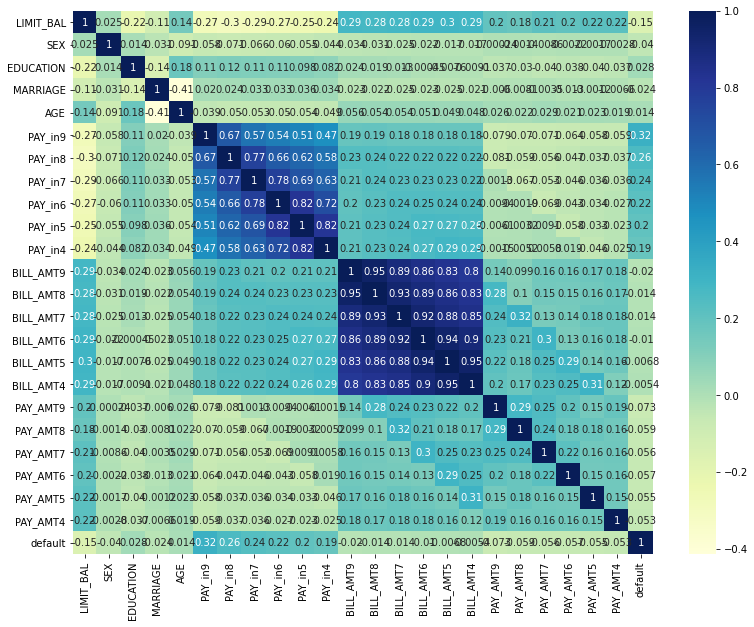

In [50]:
df_corr = rawdata.corr()
plt.figure(figsize=(13,10))
sns.heatmap(df_corr,
            cmap='YlGnBu',
            # cmap="coolwarm",
            annot = True,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

# plt.title('Data heatmap', fontsize = 12)
# plt.xticks(fontsize =12)
# plt.yticks(fontsize =12)
# plt.savefig('heatmap.png')


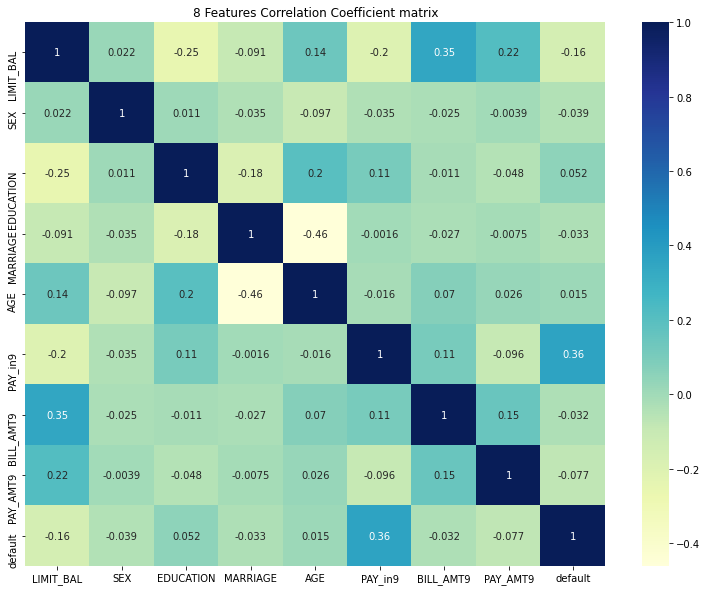

In [14]:
df_corr = data.corr()
plt.figure(figsize=(13,10))
sns.heatmap(df_corr,
            cmap='YlGnBu',
            # cmap="coolwarm",
            annot = True,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)
plt.title("8 Features Correlation Coefficient matrix")
plt.savefig('8feature_heatmap.jpeg')

